## Majid Feiz 
## Visualization of t-Test, Clustering, Heatmap and Bayesian Inference
## Revised with correction

### Part 1: t - Test

In [21]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import scipy as stat
import sklearn.linear_model as LinearRegression

In [22]:
#used this to suppress the percision when printing
def print(*args):
    __builtins__.print(*("%.3f" % a if isinstance(a, float) else a
                         for a in args))

In [23]:
Data_File_Path ='C:/Users/Owner/Documents/Majid/UConn/Data_Visualization/Data_file/'
Data_alzFe = pd.read_csv(Data_File_Path + 'GSE44768_CR_alz_female_reduced.csv')
Data_ndFe = pd.read_csv(Data_File_Path + 'GSE44768_CR_nd_female_reduced.csv')

#### Step 1

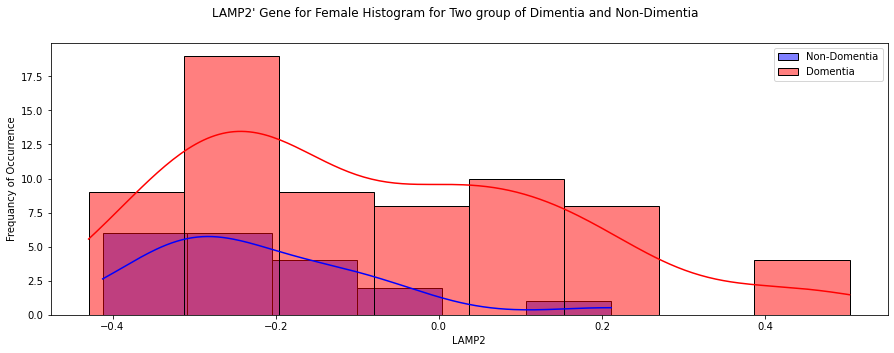

In [24]:
fig, axes = plt.subplots(figsize=(15, 5), sharey=True)
fig.suptitle("LAMP2' Gene for Female Histogram for Two group of Dimentia and Non-Dimentia")

sn.histplot(x=Data_ndFe.LAMP2, kde=True, label='Non-Domentia',color='b' ).legend()
sn.histplot(x=Data_alzFe.LAMP2, kde=True,  color='r', label='Domentia').legend()
axes.set_xlabel('LAMP2')
axes.set_ylabel('Frequancy of Occurrence')
plt.show()

#### Step 2

In [25]:
from scipy.stats import  t
from statistics import mean
import math

def degreesOfFreedom(x,y):
    std_x = x.std(ddof = 1)
    std_y = y.std(ddof = 1)
    ddof_twoSample_calc =  ((std_x**2/len(x) + std_y**2/len(y))**2)/((std_x**2/len(x))**2/(len(x)-1) + (std_y**2/len(y))**2/(len(y)-1))
    return ddof_twoSample_calc
                                                                
def t_twoSample(x, y):
    xmean = x.mean()
    ymean = y.mean()
    std_x = x.std(ddof = 1)
    std_y = y.std(ddof = 1)
    t_twoSample_calc = (xmean - ymean)/np.sqrt(std_x**2/len(x)+std_y**2/len(y))
    return t_twoSample_calc


ddof_twoSample = degreesOfFreedom(Data_ndFe.LAMP2, Data_alzFe.LAMP2)
t_twoSample_lamp2 = t_twoSample(Data_ndFe.LAMP2, Data_alzFe.LAMP2)

print('t = ',t_twoSample_lamp2,'df = ',ddof_twoSample)
prob_leftside = t.cdf(t_twoSample_lamp2, ddof_twoSample)
twoside_prop = 2*prob_leftside
twoside_prop

significent = 0.05
if twoside_prop > significent:
    print('Because {0:0.3F} (p-value) > {1} => Failed to Reject the H0'.format(twoside_prop, significent))
else:
    print('Because {0:0.3F} (p-value) < {1} => Reject the H0'.format(twoside_prop, significent))

t =  -3.079 df =  45.823
Because 0.004 (p-value) < 0.05 => Reject the H0


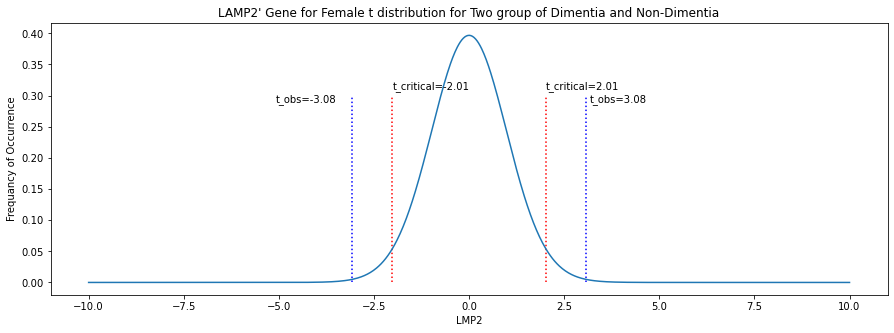

In [26]:
model_t = t(df=ddof_twoSample)
xrange = np.linspace(-10,10,1000)

y_ = model_t.pdf(xrange)


#calculating t critical based on 0.95 confidance interval: 2 tailed
t_critical = t.ppf(1-0.05/2,df=ddof_twoSample)
t_critical


fig = plt.figure(figsize=(15,5))
plt.title("LAMP2' Gene for Female t distribution for Two group of Dimentia and Non-Dimentia")
plt.plot(xrange, y_)
plt.vlines(t_critical, 0, 0.3, linestyle = ':', color ='r' )
plt.text(t_critical, 0.31, 't_critical=' + str(round(t_critical,2)))
plt.vlines(-t_critical, 0, 0.3, linestyle = ':', color ='r' )
plt.text(-t_critical, 0.31, 't_critical=' + str(round(-t_critical,2)))


plt.vlines(t_twoSample_lamp2, 0, 0.3, linestyle = ':', color='b' )
plt.text(t_twoSample_lamp2-2, 0.29, 't_obs=' + str(round(t_twoSample_lamp2,2)))
plt.vlines(-t_twoSample_lamp2, 0, 0.3, linestyle = ':' , color='b')
plt.text(-t_twoSample_lamp2+0.1, 0.29, 't_obs=' + str(round(-t_twoSample_lamp2,2)))
plt.xlabel('LMP2')
plt.ylabel('Frequancy of Occurrence')
plt.show()





The null hypothesis is H0 "The mean gene expression values between the Dementia group and Non-Dementia group among female patients are not different."   
Since the t observed is less than the critical t for the two-sample test, it reject the hypothesis; thus, there is difference between the Dementia group and Non-Dementia group among female patients. 

#### Step 3

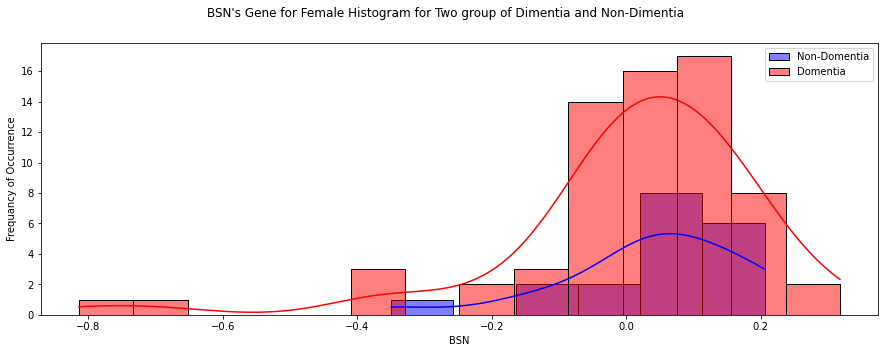

In [27]:
fig, axes = plt.subplots(figsize=(15, 5), sharey=True)
fig.suptitle("BSN's Gene for Female Histogram for Two group of Dimentia and Non-Dimentia")

sn.histplot(x=Data_ndFe.BSN, kde=True, label='Non-Domentia',color='b' ).legend()
sn.histplot(x=Data_alzFe.BSN, kde=True,  color='r', label='Domentia').legend()
axes.set_xlabel('BSN')
axes.set_ylabel('Frequancy of Occurrence')
plt.show()

In [28]:
from scipy.stats import  t
def degreesOfFreedom(x,y):
    std_x = x.std(ddof = 1)
    std_y = y.std(ddof = 1)
    ddof_twoSample_calc =  ((std_x**2/len(x) + std_y**2/len(y))**2)/((std_x**2/len(x))**2/(len(x)-1) + (std_y**2/len(y))**2/(len(y)-1))
    return ddof_twoSample_calc
                                                                
def t_twoSample(x, y):
    xmean = x.mean()
    ymean = y.mean()
    std_x = x.std(ddof = 1)
    std_y = y.std(ddof = 1)
    t_twoSample_calc = (xmean - ymean)/np.sqrt(std_x**2/len(x)+std_y**2/len(y))
    return t_twoSample_calc


ddof_twoSample_bsn = degreesOfFreedom(Data_ndFe.BSN, Data_alzFe.BSN)
t_twoSample_bsn = t_twoSample(Data_ndFe.BSN, Data_alzFe.BSN)

print('t = ',t_twoSample_bsn,'df = ',ddof_twoSample_bsn)
prob_rightside_bsn = 1-t.cdf(t_twoSample_bsn,ddof_twoSample_bsn)
twoside_prop_bsn = 2*prob_rightside_bsn
twoside_prop_bsn

significent = 0.05
if twoside_prop_bsn > significent:
    print('Because {0:0.3F}(p-value) > {1} => Failed to Reject the H0'.format(twoside_prop_bsn, significent))
else:
    print('Reject the H0')

t =  0.724 df =  40.421
Because 0.473(p-value) > 0.05 => Failed to Reject the H0


2.020


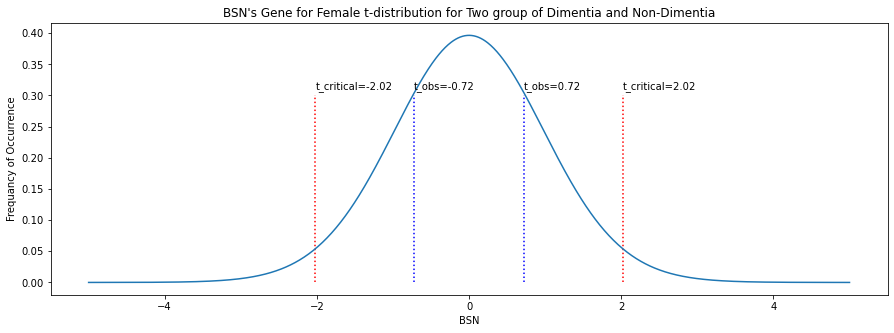

In [29]:
model_t_bsn = t(df=ddof_twoSample_bsn)

#xrange = np.linspace(t.ppf(0.001, ddof_twoSample_bsn), t.ppf(0.999, ddof_twoSample_bsn), 100)
xrange = np.linspace(-5,5,1000)
y_bsn = model_t_bsn.pdf(xrange)


#calculating t critical based on 0.95 confidance interval:2 tailed 
t_critical_bsn = t.ppf(1-0.05/2,df=ddof_twoSample_bsn)
t_critical_bsn
print(t_critical_bsn)

fig = plt.figure(figsize=(15,5))
plt.title("BSN's Gene for Female t-distribution for Two group of Dimentia and Non-Dimentia")
plt.plot(xrange, y_bsn)
plt.vlines(t_critical_bsn, 0, 0.3, linestyle = ':', color ='r' )
plt.text(t_critical_bsn, 0.31, 't_critical=' + str(round(t_critical_bsn,2)))
plt.vlines(-t_critical_bsn, 0, 0.3, linestyle = ':', color ='r' )
plt.text(-t_critical_bsn, 0.31, 't_critical=' + str(round(-t_critical_bsn,2)))


plt.vlines(t_twoSample_bsn, 0, 0.3, linestyle = ':', color='b' )
plt.text(t_twoSample_bsn, 0.31, 't_obs=' + str(round(t_twoSample_bsn,2)))

plt.vlines(-t_twoSample_bsn, 0, 0.3, linestyle = ':' , color='b')
plt.text(-t_twoSample_bsn, 0.31, 't_obs=' + str(round(-t_twoSample_bsn,2)))
plt.xlabel('BSN')
plt.ylabel('Frequancy of Occurrence')
plt.show()

#### Step 4

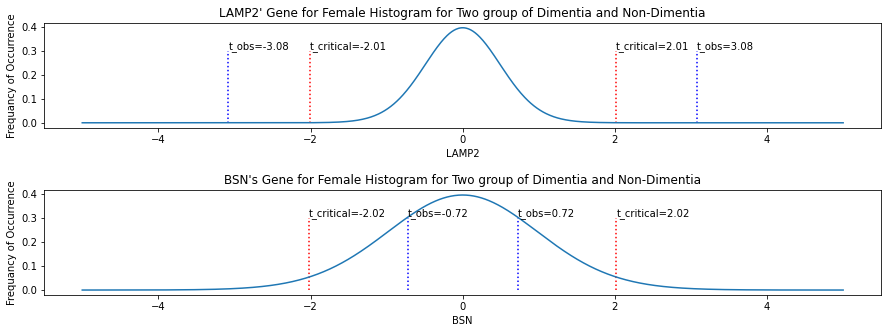

In [30]:
fig = plt.figure(figsize=(15, 5))
ax1 = plt.subplot2grid((2,1), (0,0))
#ax1.grid(True)
ax1.set_xlabel('xx');ax1.set_ylabel('yy')
#ax1.set_title('Female with Alzheimer \n Comparing Gene Expression TYROBP vs. DOCK2 \n Pearsonr Coef Corrolation = {0:.2F}'.format(CorrTyrobp_Dock2),fontsize=12);



ax1.plot(xrange, y_)
ax1.vlines(t_critical, 0, 0.3, linestyle = ':', color ='r' )
ax1.text(t_critical, 0.31, 't_critical=' + str(round(t_critical,2)))
ax1.vlines(-t_critical, 0, 0.3, linestyle = ':', color ='r' )
ax1.text(-t_critical, 0.31, 't_critical=' + str(round(-t_critical,2)))


ax1.vlines(t_twoSample_lamp2, 0, 0.3, linestyle = ':', color='b' )
ax1.text(t_twoSample_lamp2, 0.31, 't_obs=' + str(round(t_twoSample_lamp2,2)))
ax1.vlines(-t_twoSample_lamp2, 0, 0.3, linestyle = ':' , color='b')
ax1.text(-t_twoSample_lamp2, 0.31, 't_obs=' + str(round(-t_twoSample_lamp2,2)))
ax1.set_title("LAMP2' Gene for Female Histogram for Two group of Dimentia and Non-Dimentia")
ax1.set_xlabel('LAMP2')
ax1.set_ylabel('Frequancy of Occurrence')

#print(t_twoSample_lamp2)

ax2 = plt.subplot2grid((2,1), (1,0)) 

ax2.plot(xrange, y_bsn)
ax2.vlines(t_critical_bsn, 0, 0.3, linestyle = ':', color ='r' )
ax2.text(t_critical_bsn, 0.31, 't_critical=' + str(round(t_critical_bsn,2)))
ax2.vlines(-t_critical_bsn, 0, 0.3, linestyle = ':', color ='r' )
ax2.text(-t_critical_bsn, 0.31, 't_critical=' + str(round(-t_critical_bsn,2)))


ax2.vlines(t_twoSample_bsn, 0, 0.3, linestyle = ':', color='b' )
ax2.text(t_twoSample_bsn, 0.31, 't_obs=' + str(round(t_twoSample_bsn,2)))

ax2.vlines(-t_twoSample_bsn, 0, 0.3, linestyle = ':' , color='b')
ax2.text(-t_twoSample_bsn, 0.31, 't_obs=' + str(round(-t_twoSample_bsn,2)))



ax2.set_xlabel('xxxx');ax2.set_ylabel('yyyyy')
#ax2.grid(True)
#ax2.set_title('Female with Alzheimer \n Comparing Gene Expression TYROBP vs. GSTA4 \n Pearsonr Coef Corrolation = {0:.2F}'.format(CorrTyrobp_GSTA4),fontsize=12);
ax2.set_title("BSN's Gene for Female Histogram for Two group of Dimentia and Non-Dimentia")
ax2.set_xlabel('BSN')
ax2.set_ylabel('Frequancy of Occurrence')

plt.subplots_adjust(wspace=0.6, hspace=0.6)

plt.show()


Since the t observed is larger than the critical t for the two-sample test, it failed to reject the hypothesis; thus, there is no difference between the Dementia group and Non-Dementia group for female patients based on BSN Gene expression.
From Step 2 results, we see a difference in the mean value for the LAMP2 gene expression. 
So the conclusion is if we would like to do more research, the LAM2 gene expression will clearly distinguish between dementia and non-dementia cases.

In [31]:

# solving based .....
from scipy.stats import ttest_ind
def p_value(x,y):
    a , b = ttest_ind(x, y, equal_var=False)
    return b
b1 = p_value(Data_ndFe.BSN, Data_alzFe.BSN)
b1






0.47302109756690935

### Part II: Clustering and Heatmap

#### Step 1

In [32]:
Data_File_Path ='C:/Users/Owner/Documents/Majid/UConn/Data_Visualization/Data_file/'
Data = pd.read_csv(Data_File_Path + 'GSE44768_CR_40_54_Combined.csv')
#pd.set_option('display.max_rows', 50)
#Data = Data.set_index(['GSM_ID'])
Data.head()

,GSM_ID,XIST,TYROBP,DOCK2,FCER1G,GSTA4,ABCC2,TIMELESS,ACBD5,LMAN1,...,DTL,UBE2C,BUB1,RFX4,DGCR6,AQP4,MT1M,AMPD1,EGR2,PDGFB
0,GSM1090268_alz_f,0.301474,0.209515,0.161961,0.310937,-0.179295,-0.009254,0.027849,0.057428,-0.041127,...,0.008948,0.009005,0.124712,0.129920,0.262155,-0.133542,0.256252,0.037935,-0.347338,0.045741
1,GSM1090271_alz_f,0.460495,-0.162172,-0.089598,-0.132007,-0.010090,0.027530,-0.007816,-0.006689,-0.042820,...,-0.016638,0.053465,-0.044457,0.082901,0.054048,0.193930,0.237436,0.076833,-0.440042,0.081575
2,GSM1090272_alz_f,0.238641,0.280427,0.313561,0.267188,-0.104727,0.130515,0.228776,-0.076101,-0.070623,...,0.332830,0.195650,0.203180,-0.156819,-0.077294,-0.180468,-0.128067,0.050049,-0.150672,0.069818
3,GSM1090274_alz_f,0.276038,0.400028,0.251572,0.275051,-0.330179,0.137491,0.105215,-0.096334,-0.082235,...,-0.031214,0.021954,-0.032470,0.032545,0.308341,0.191308,0.662724,-0.036906,-0.119441,0.252757
4,GSM1090276_alz_f,0.435775,-0.293323,-0.262795,-0.138666,-0.016549,0.013355,-0.006286,-0.259489,-0.175851,...,0.001323,0.094361,-0.004207,0.150745,0.272414,0.220450,0.019569,0.093613,-0.000378,0.222436


#### Pre Step 2,3,4

In [40]:
genes = Data.columns[1:]
genes
#or alternatively you can use this:
#feature = Data.iloc[:,1:]

Index(['XIST', 'TYROBP', 'DOCK2', 'FCER1G', 'GSTA4', 'ABCC2', 'TIMELESS',
       'ACBD5', 'LMAN1', 'KIFAP3', 'PCTK2', 'SNCA', 'RPS27', 'RPS18', 'PCBP2',
       'STIP1', 'HSPA1A', 'DOPEY1', 'ENPP2', 'GAB2', 'TUBB4', 'ACTG1',
       'SLC22A2', 'AGTR1', 'ZIC2', 'TEKT1', 'FANK1', 'HYDIN', 'MED6', 'SFRS3',
       'PPP2R5A', 'RNASE11', 'LAMP2', 'P2RX7', 'MID1IP1', 'GJA1', 'STON2',
       'CST3', 'CREBBP', 'ABCC11', 'MDGA1', 'SNAP91', 'BSN', 'GLS', 'DTL',
       'UBE2C', 'BUB1', 'RFX4', 'DGCR6', 'AQP4', 'MT1M', 'AMPD1', 'EGR2',
       'PDGFB'],
      dtype='object')

In [34]:
def add_indx(a,string):
    dic ={}
    row_num = 0
    for i in a:
        row_num += 1
        if string in i:
            dic[i] ='*_'+ str(row_num)+'_'+string
    return dic

dd1=add_indx(Data.GSM_ID,'alz_f')        
dd2=add_indx(Data.GSM_ID,'nd_f')
dd3=add_indx(Data.GSM_ID,'alz_m')
dd4=add_indx(Data.GSM_ID,'nd_m')

dd = {**dd1, **dd2, **dd3, **dd4}

Data['newindx'] = [dd[i] for i in dd]

Data = Data.set_index(['newindx'])


In [35]:
def addcolor(a,string,color):
    dic ={}
    for i in a:
        if string in i:
            dic[i] = color
    return dic

d1=addcolor(Data.GSM_ID,'alz_f', 'red')        
d2=addcolor(Data.GSM_ID,'nd_f', 'green')
d3=addcolor(Data.GSM_ID,'alz_m', 'yellow')
d4=addcolor(Data.GSM_ID,'nd_m', 'blue')

d = {**d1, **d2, **d3, **d4}

patient_colors=Data.GSM_ID.map(d)


#### Step 2

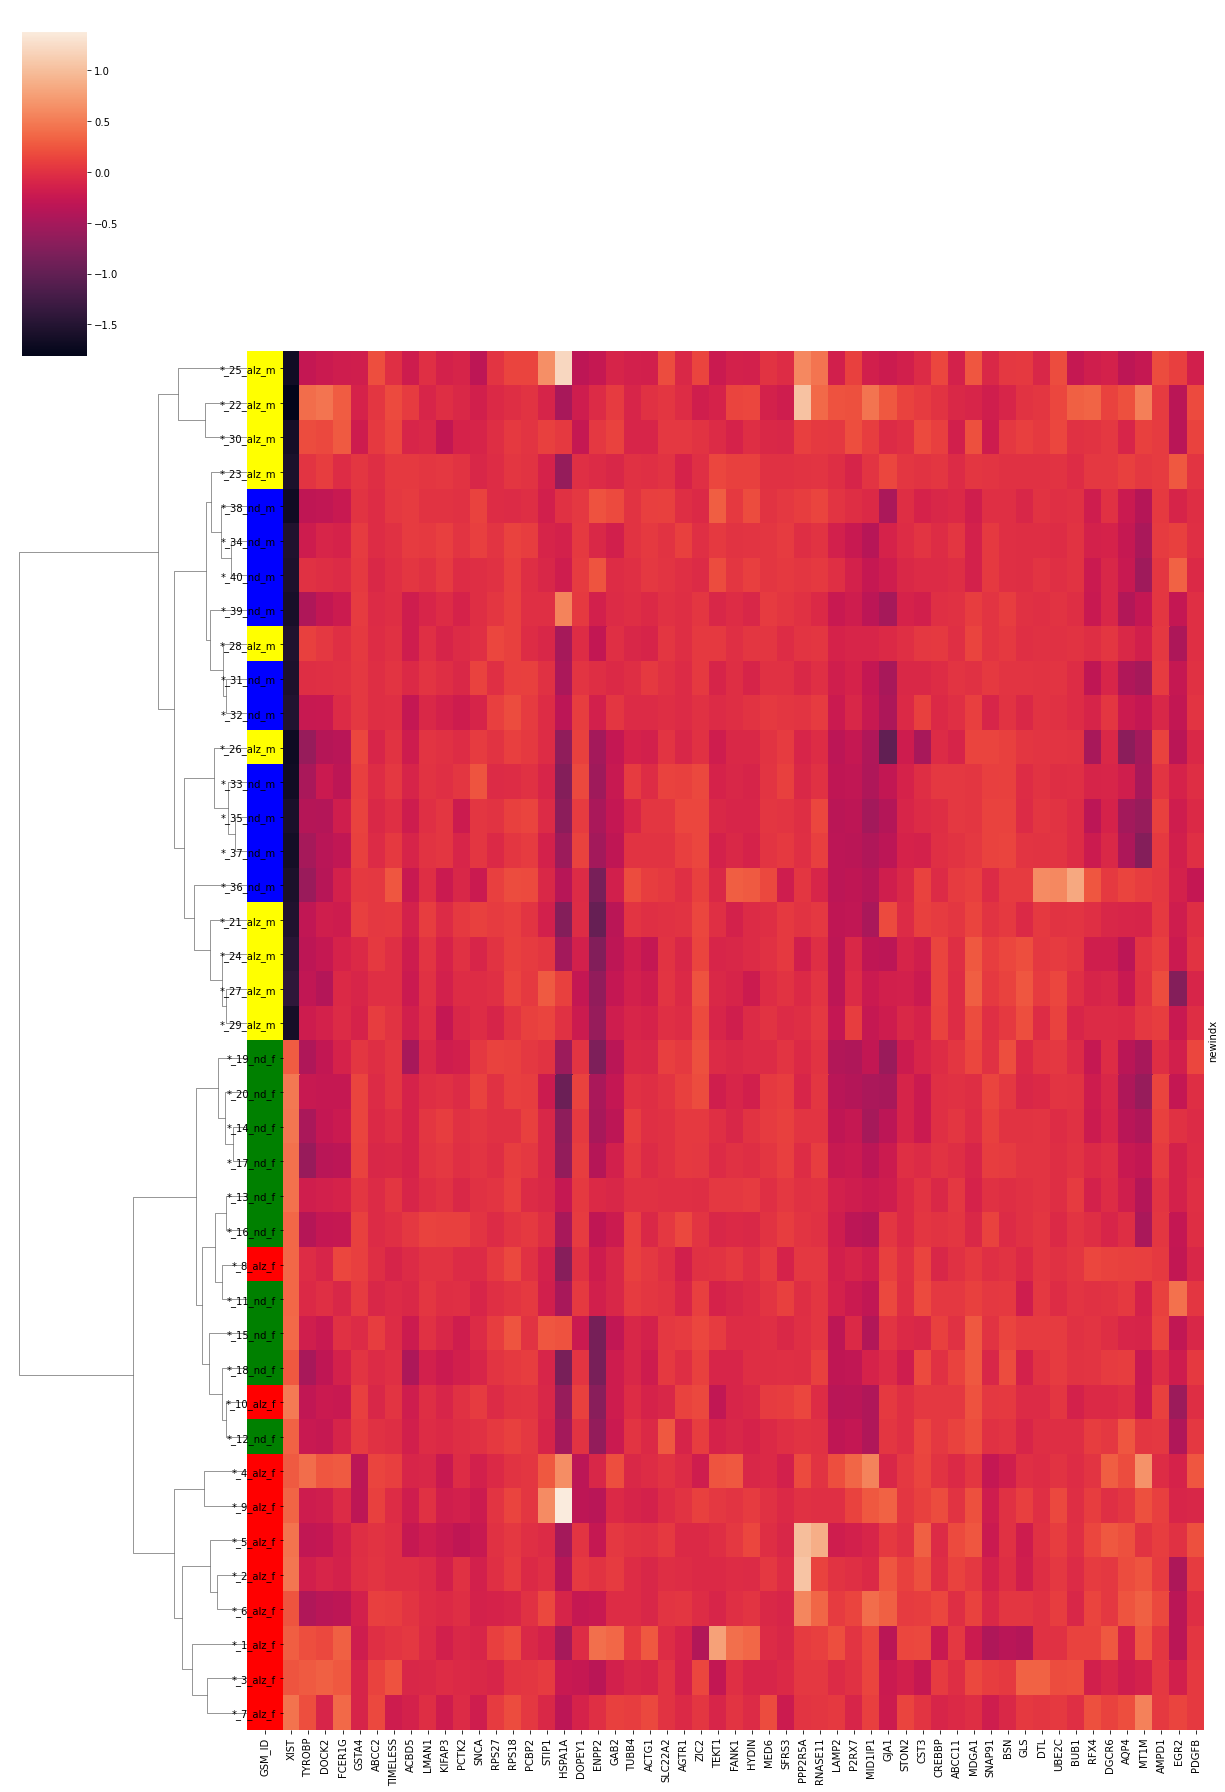

In [36]:
g=sn.clustermap(Data[genes], figsize=(18, 25), method='ward', col_cluster=False, row_cluster = True, row_colors=patient_colors, yticklabels=True) #xticklabels=True ,linewidths=0.004
g.ax_heatmap.yaxis.set_ticks_position("left")

One good observation is that females' gene expression for nondementia vs Alzheimer's is much better clustered than men's gene.
In men's genes, however, if it the group is cut from a lower level (smaller cluster), the regrouping to nondementia vs. Alzheimer's can be observed more clearly with a few exceptions.

#### Step 3

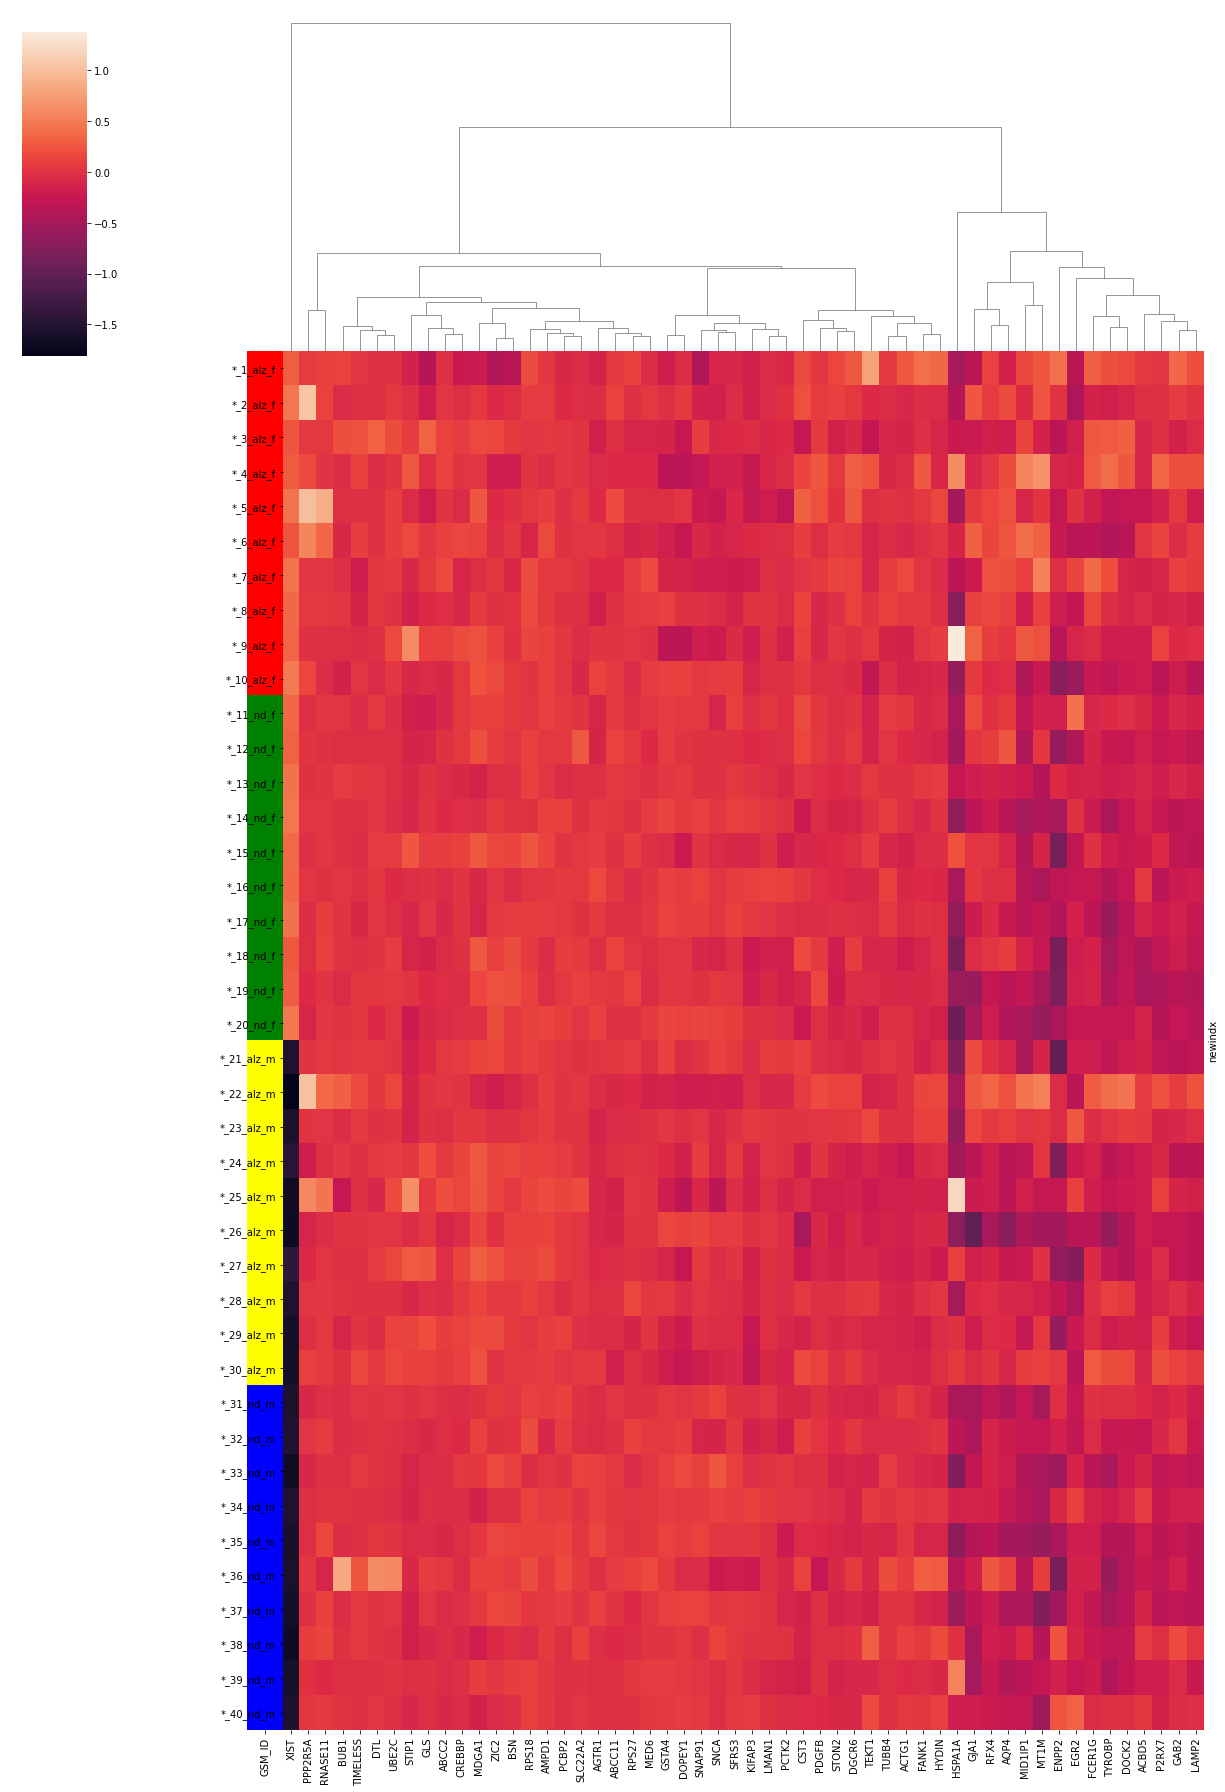

In [37]:
g=sn.clustermap(Data[genes], figsize=(18, 25), method='ward', col_cluster=True, row_cluster = False, row_colors=patient_colors, yticklabels=True) #xticklabels=True ,linewidths=0.004
g.ax_heatmap.yaxis.set_ticks_position("left")

One observation is with a couple of exceptions (i.e., XIST,  PPP2R5A, and RNASE11), all genes are well clustered into three main groups or three smaller subgroups. 

#### Step 4

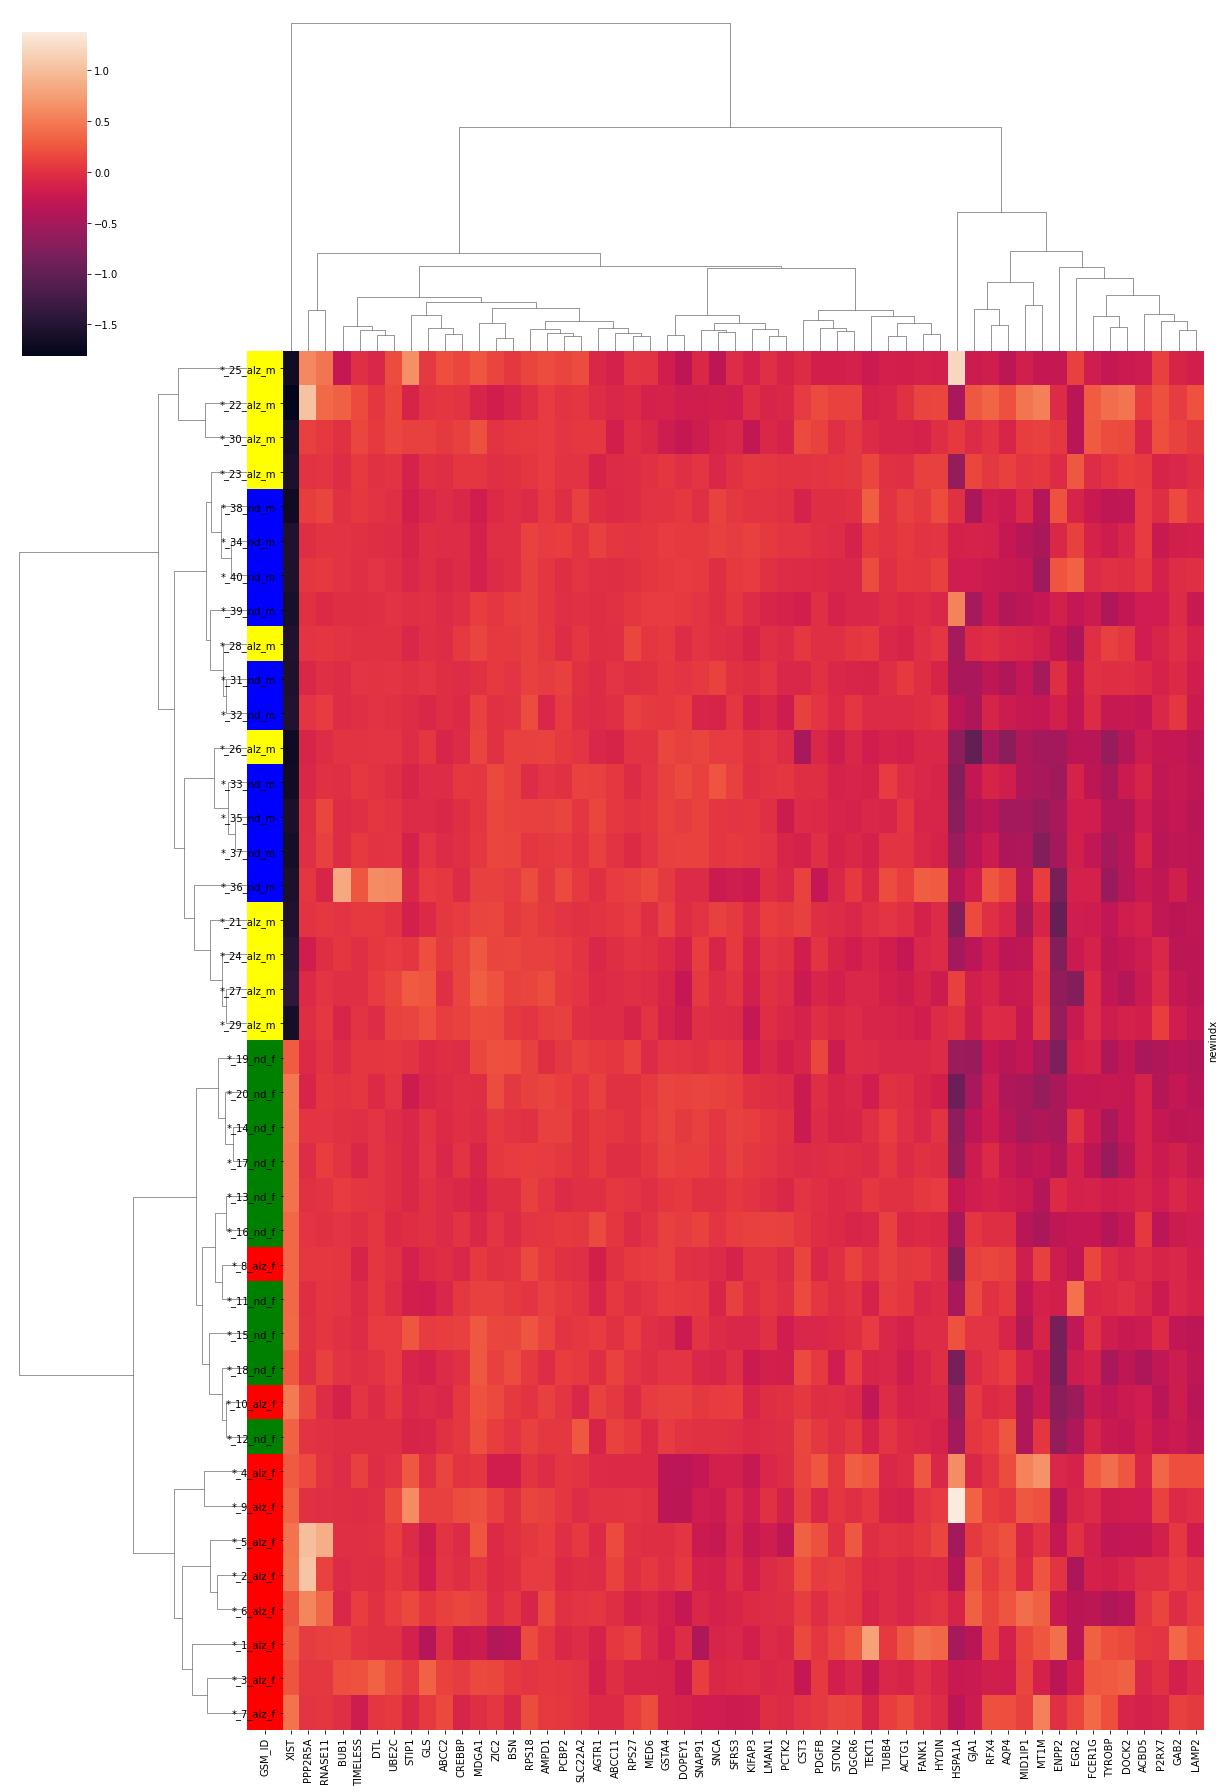

In [38]:
g=sn.clustermap(Data[genes], figsize=(18, 25), method='ward', col_cluster=True, row_cluster = True, row_colors=patient_colors, yticklabels=True) #xticklabels=True ,linewidths=0.004
g.ax_heatmap.yaxis.set_ticks_position("left")

Generally speaking, we can isolate a group of meaningful genes cutting across gender (M/F) and/or disease phenotype (Dementia/NonDementia).
However, it is apparent that females' gene expression for nondementia vs Alzheimer's is much better clustered than men's gene.
In men's genes, however, if it the group is cut from a lower level (smaller cluster), the regrouping to nondementia vs. Alzheimer's can be observed more clearly with a few exceptions.